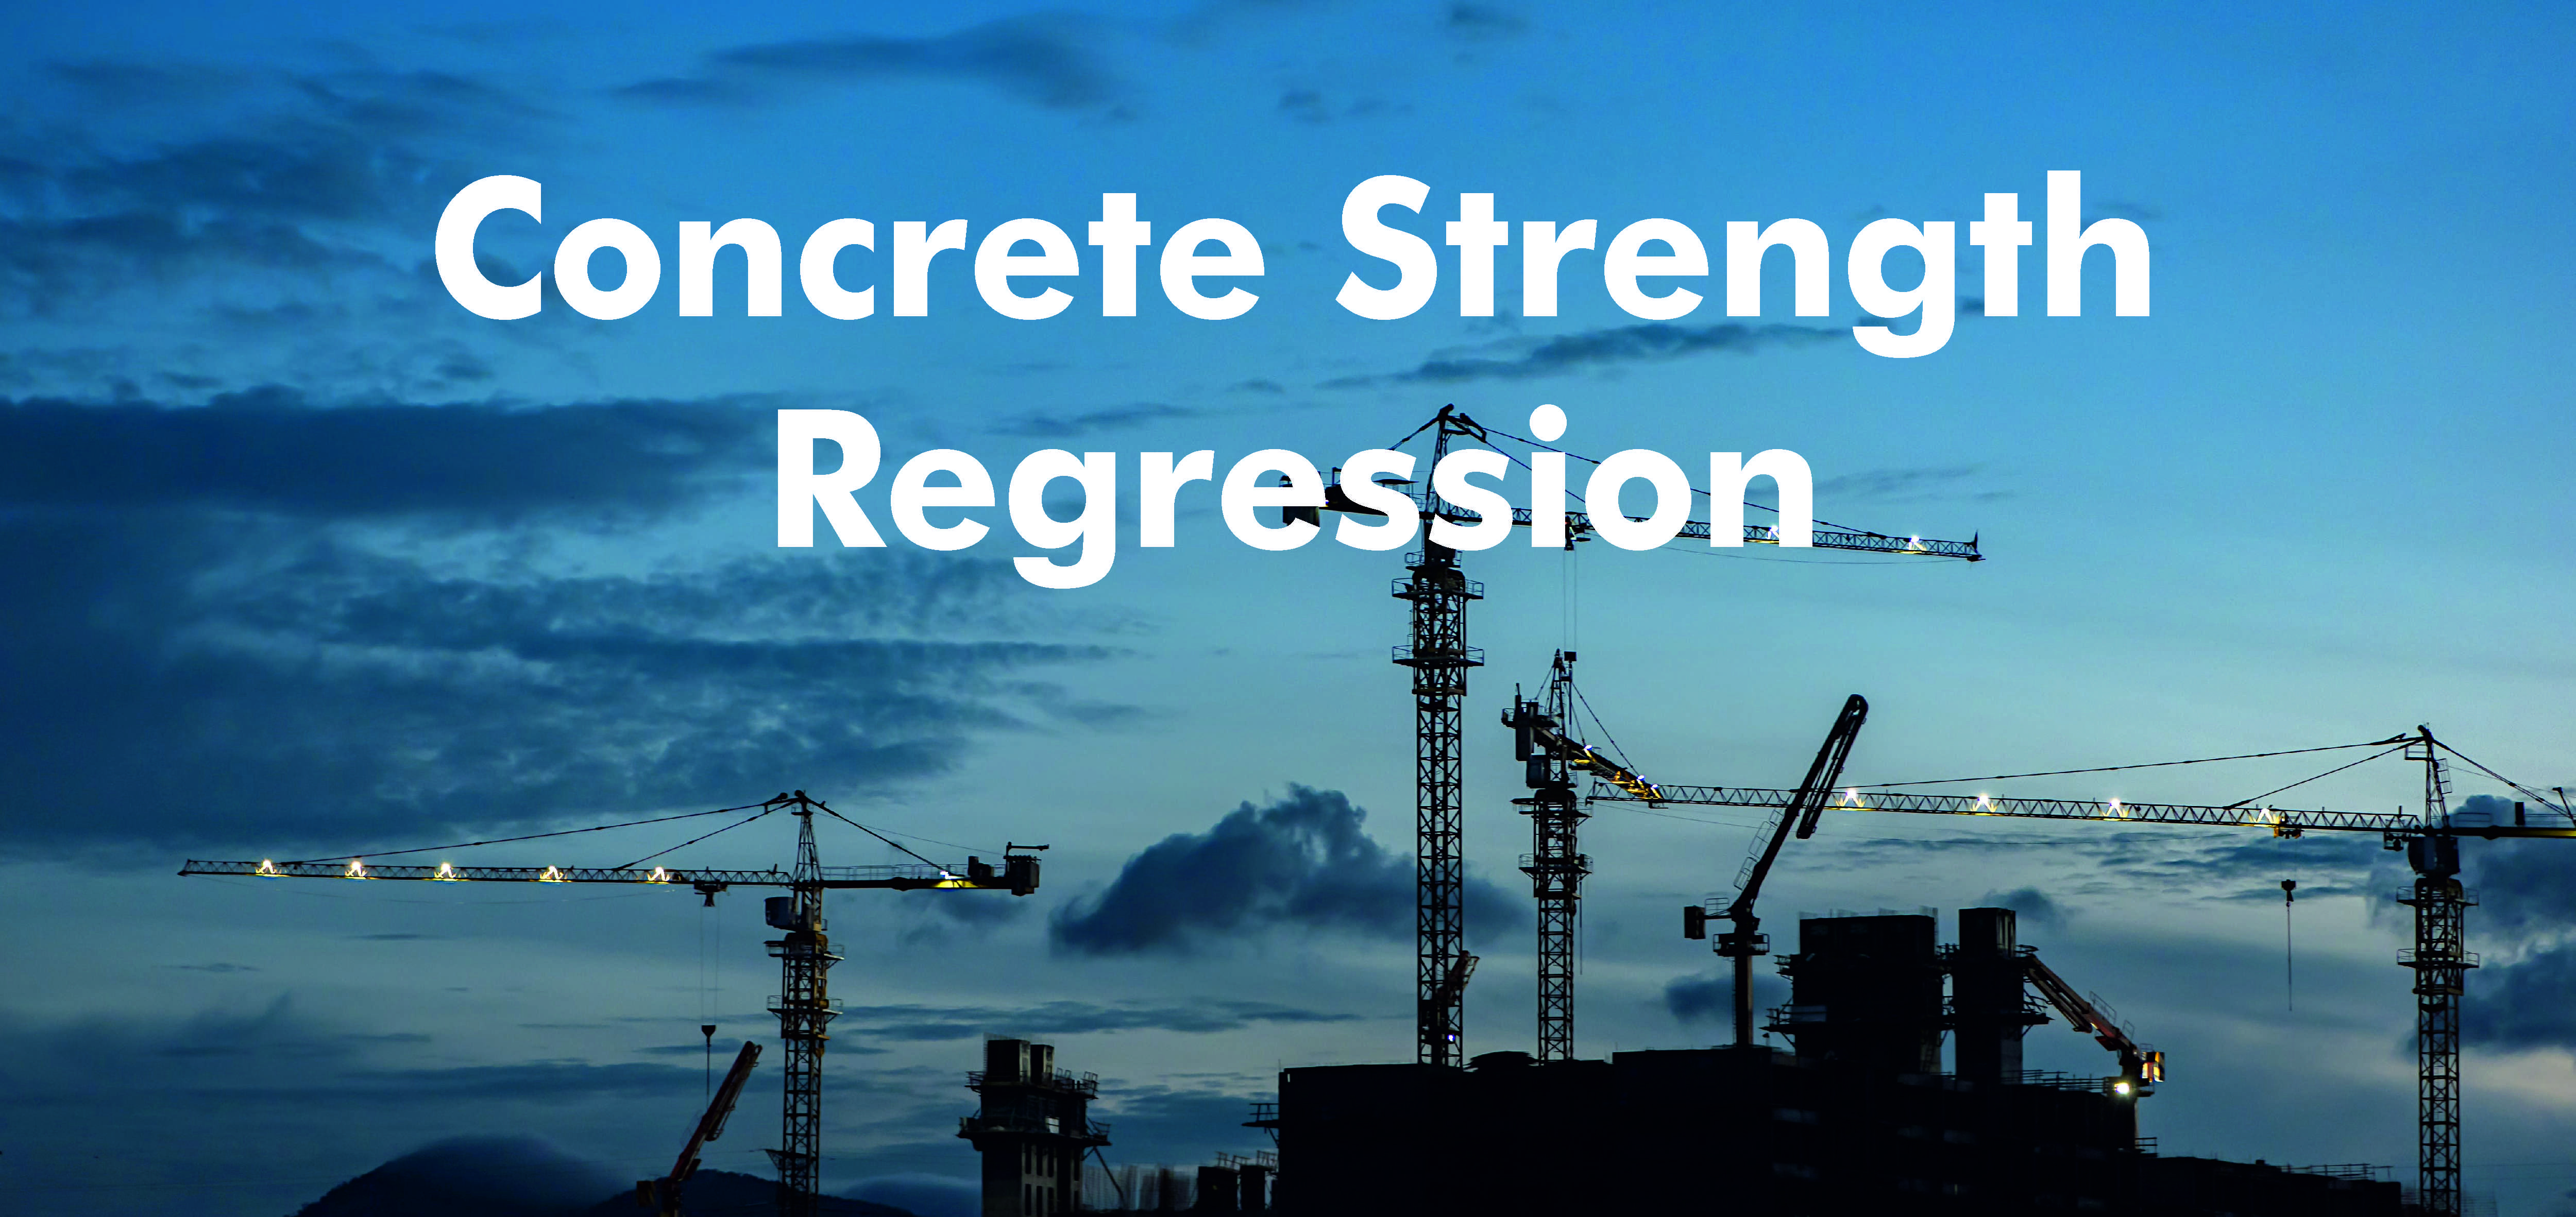

## Concrete Strength Regression

Concrete is one of the most important materials in Civil Engineering. Knowing the compressive strength of concrete is very important when constructing a building or a bridge. The Compressive Strength of Concrete is a highly nonlinear function of ingredients used in making it and their characteristics. Thus, using Machine Learning to predict the Strength could be useful in generating a combination of ingredients which result in high Strength.

### Problem Statement
Predicting Compressive Strength of Concrete given its age and quantitative measurements of ingredients.

### Data Description

* Number of instances - 1030
* Number of Attributes - 9
  * Attribute breakdown - 8 quantitative inputs, 1 quantitative output

#### Attribute information

##### Inputs

* Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
* Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
* Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
* Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
* Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
* Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
* Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable


All above features measured in kg/$m^3$

* Age -- quantitative -- Day (1~365) -- Input Variable

##### Output
* Concrete compressive strength -- quantitative -- MPa -- Output Variable




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount ('/drive')

Mounted at /drive


##### Loading the Data 

In [ ]:
df = pd.read_csv('/drive/MyDrive/Data Sets/Concrete_Data_Yeh.csv')

In [ ]:
df.shape

(1030, 9)

In [ ]:
print(df.head())

   cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0   540.0    0.0     0.0  162.0               2.5           1040.0   
1   540.0    0.0     0.0  162.0               2.5           1055.0   
2   332.5  142.5     0.0  228.0               0.0            932.0   
3   332.5  142.5     0.0  228.0               0.0            932.0   
4   198.6  132.4     0.0  192.0               0.0            978.4   

   fineaggregate  age  csMPa  
0          676.0   28  79.99  
1          676.0   28  61.89  
2          594.0  270  40.27  
3          594.0  365  41.05  
4          825.5  360  44.30  


In [ ]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Observation

It shows that there are eight independent variables(cement, slag, ash,water,superplastic,coarseagg,fineagg,age) and one dependent variable(strength) All the records are numeric

###### Checking for 'null' values

In [ ]:
df.isna().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

There are no null values in the data.

### EDA

Exploring the data.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
flyash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseaggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineaggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
csMPa,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


All of the data in the dataset is numerical

No null/NAN data

Age data appears to have outliers because max value is very large as compared to 3rd IQ 

##### Checking the pairwise relations of Features.

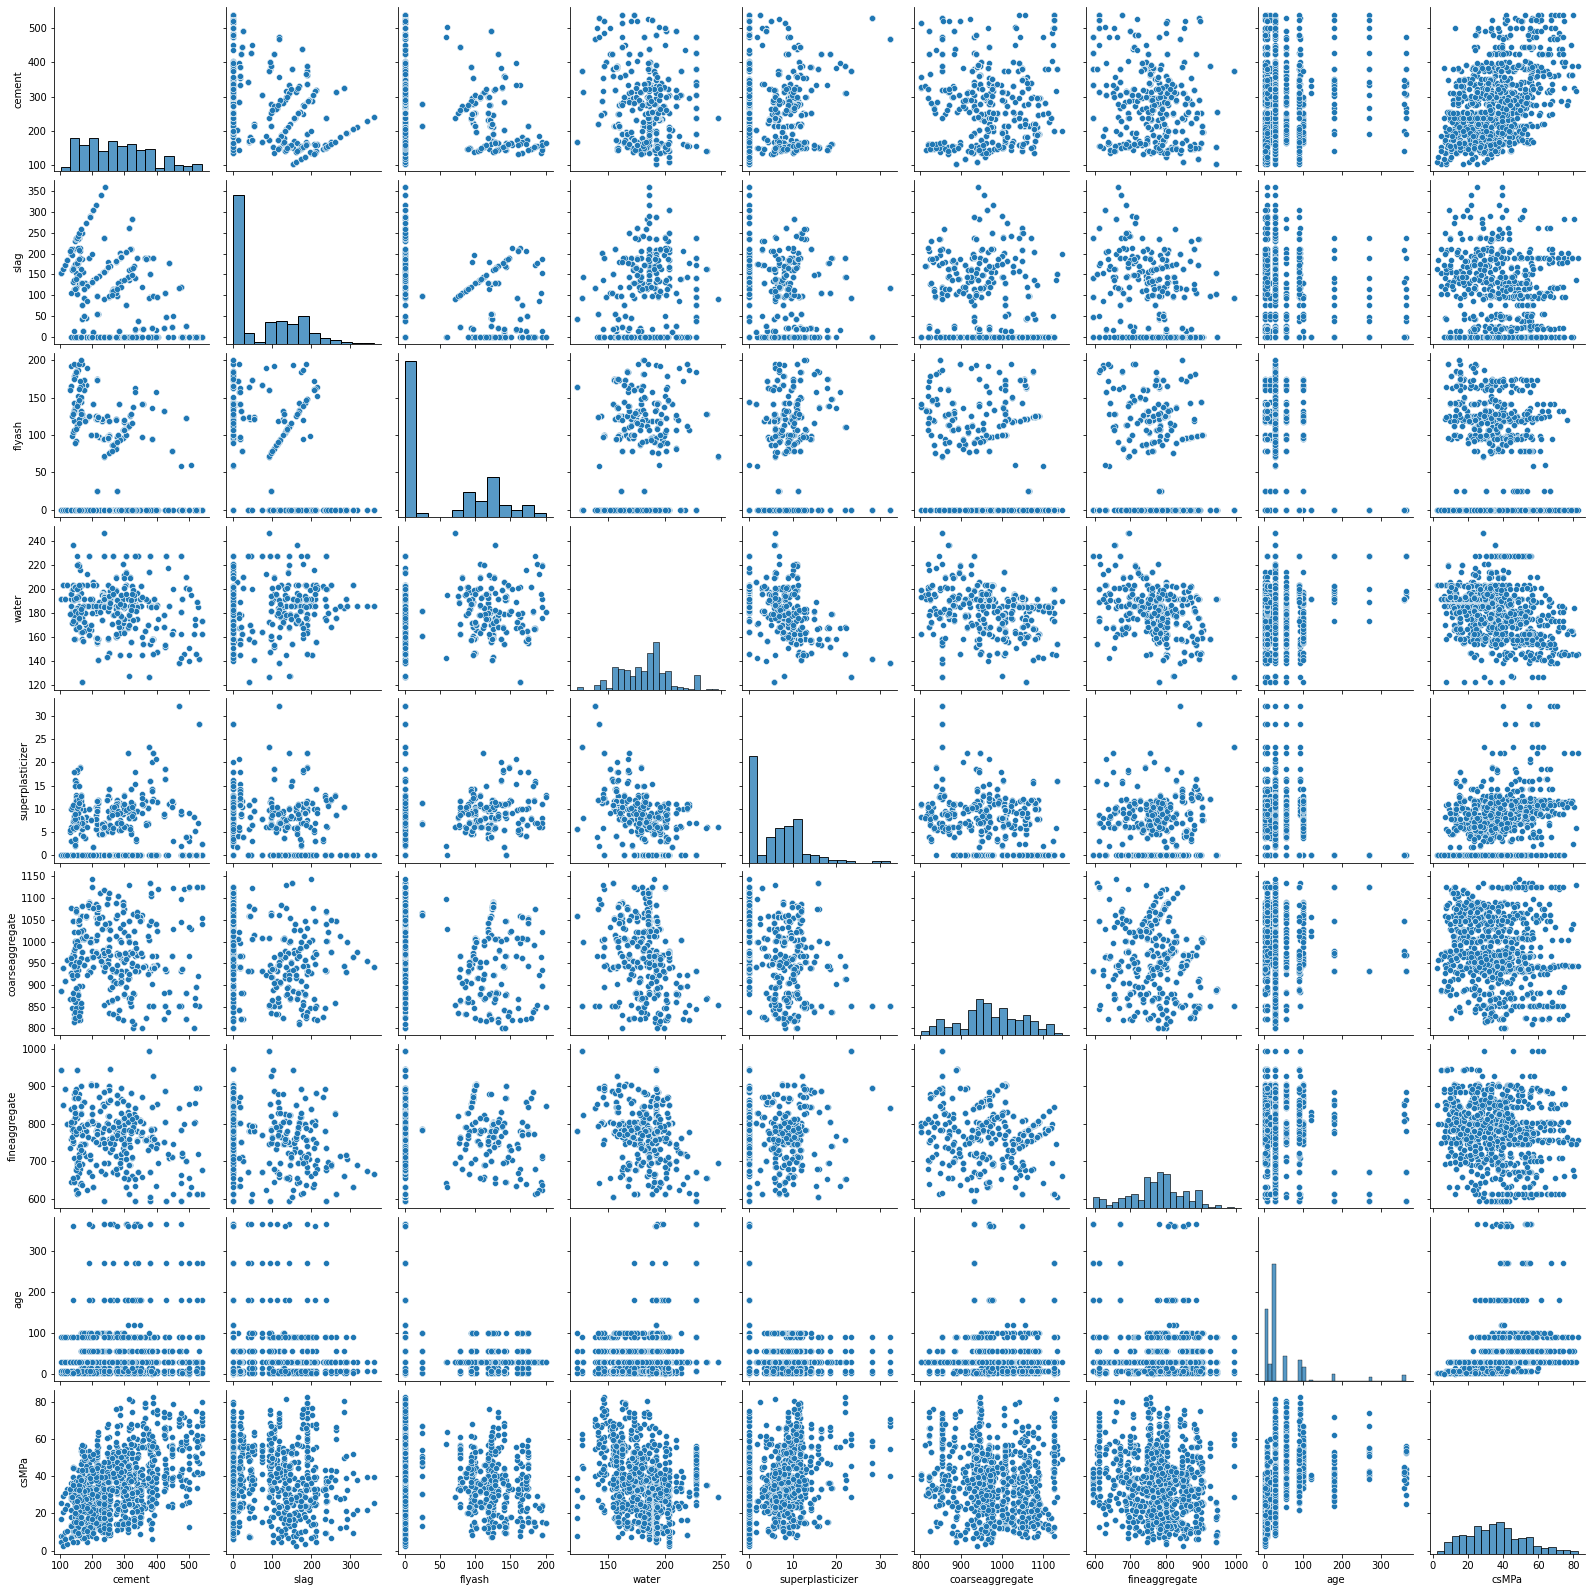

In [ ]:
plt.Figure(figsize=(4,4))
sns.pairplot(df)

There seems to be no high correlation between independant variables (features). This can be further confirmed by plotting the **Pearson Correlation coefficients** between the features.

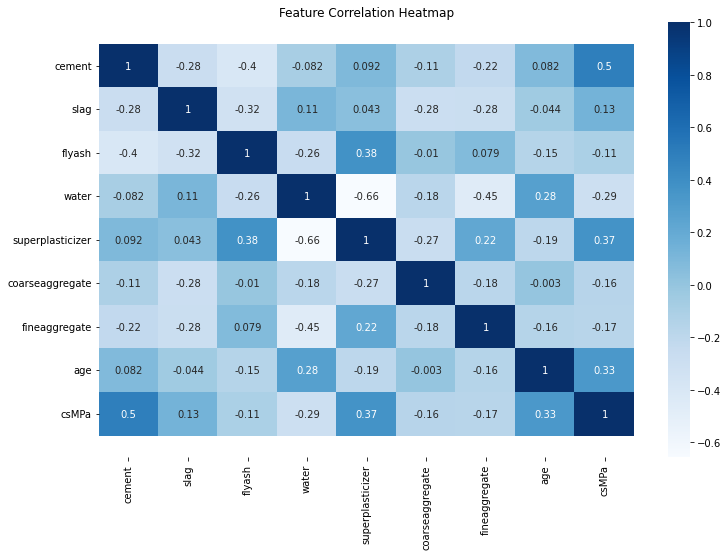

In [ ]:
corr = df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='Blues')
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

INSIGHTS

* There are'nt any **high** correlations between **Compressive strength** and other features except for **Cement**, which should be the case for more strength.
* **Age** and **Super plasticizer** are the other two features which are strongly correlated with **Compressive Strength**.



Fly ash is a very weak predictor because the distribution is like a cloud

slag, coarseagg and fineagg are also weak predictors

Water appears to have a **negative correlation** with strength(MPa)

OTHER INSIGHTS

* **Super Plasticizer** seems to have a negative high correlation with **Water**, positive correlations with **Fly ash** and **Fine aggregate**.

In [ ]:
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

Text(0.5, 1.0, 'Compressive Strength Distribution')

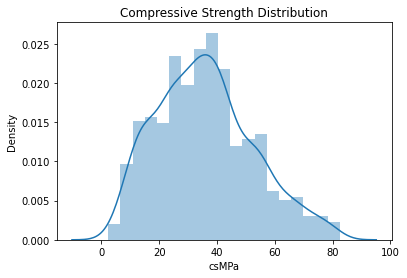

In [ ]:
ax = sns.distplot(df.csMPa)
ax.set_title("Compressive Strength Distribution")

**scatter plots between CC_Strength and other features to see more complex relations.**

**CC_Strength vs (Cement, Age, Water)**

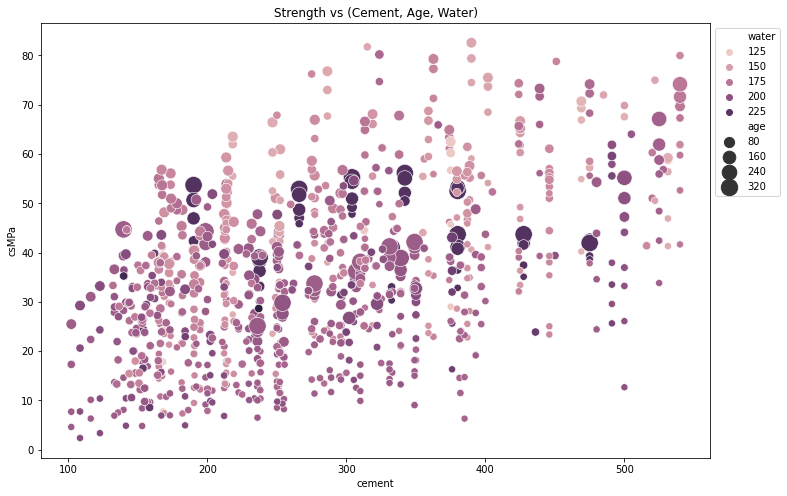

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(y="csMPa", x="cement", hue="water", size="age", data=df, ax=ax, sizes=(50, 300))
ax.set_title("Strength vs (Cement, Age, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

#### Observations from Strength vs (Cement, Age, Water)
* Compressive **strength increases with amount of cement**
* Compressive **strength increases with age**
* Cement with **low age** requires **more cement** for **higher strength**
* The **older the cement** is the **more water** it requires
* Concrete **strength increases** when **less water** is used in preparing it  

**CC Strength vs (Fine aggregate, Super Plasticizer, Fly Ash)**

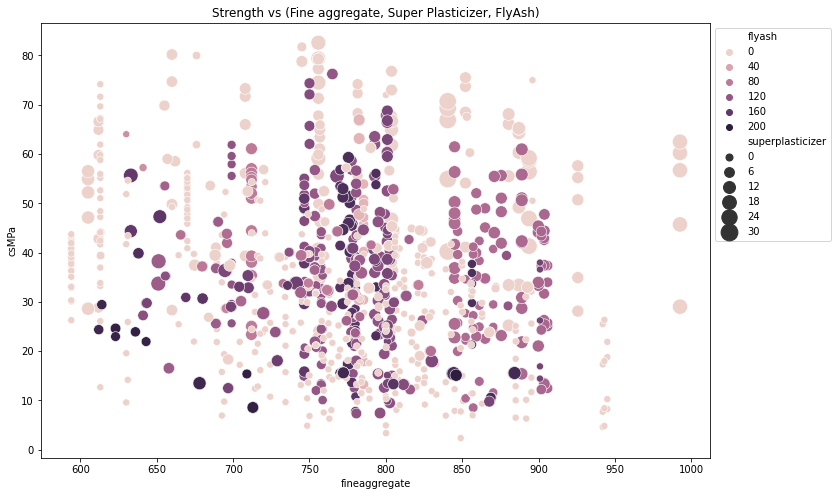

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(y="csMPa", x="fineaggregate", hue="flyash", size="superplasticizer", 
                data=df, ax=ax, sizes=(50, 300))
ax.set_title("Strength vs (Fine aggregate, Super Plasticizer, FlyAsh)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

##### Observations from Strength vs (Fine aggregate, Super Plasticizer, FlyAsh)
* As **Flyash increases** the **strength decreases**
* **Strength increases** with **Super plasticizer**

##### **Checking the outlier in dataset.**

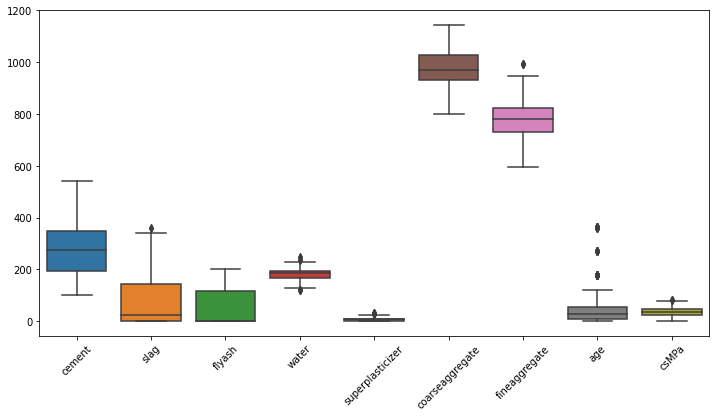

In [ ]:
plt.subplots(figsize=(12, 6))
ax = sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [ ]:
# Count outliers % 
q1= df.quantile(0.25)
q3= df.quantile(0.75)
IQR = q3-q1
outliers = pd.DataFrame(((df > (q3+1.5*IQR)) | (df < (q1-IQR*1.5))).sum(axis=0), columns=['No. of outliers'])
outliers['Percentage of outliers'] = round(outliers['No. of outliers']*100/len(df), 2)
outliers

,No. of outliers,Percentage of outliers
cement,0,0.00
slag,2,0.19
flyash,0,0.00
water,9,0.87
superplasticizer,10,0.97
coarseaggregate,0,0.00
fineaggregate,5,0.49
age,59,5.73
csMPa,4,0.39


##### Chi-square analysis to check relation between `age & csMPa`

In [ ]:
from sklearn.feature_selection import chi2

In [ ]:

X = df.iloc[:,7]         # Features - means independent variable
Y = df.iloc[:,-1]          # Target - means dependent variable


from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=11)



X_train = X_train.values.reshape(-1, 1)
Y_train = Y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
Y_test = Y_test.values.reshape(-1, 1)

In [ ]:
#f_score = chi2(X_train, Y_train)

**Observations**

Age column appears to be having maximum number of outliers

Slag, Water, superplastic, fineagg features have some outliers

### **Data Preprocessing**

Separating Input Features and Target Variable. 

In [ ]:
X = df.iloc[:,:-1]         # Features - means independent variable
Y = df.iloc[:,-1]          # Target - means dependent variable

##### Splitting data into Training and Test splits. 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=11)

##### Feature Scaling 
Standardizing the data i.e. to rescale the features to have a mean of zero and standard deviation of 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

The scaler is fit on the training data and not on testing data. Since, we are training our model on rescaled Training data and the model performs well when the testing data follows same distribution. And if the scaler is fit on testing data again, this would result in testing data having a different mean and standard deviation. Resulting in loss of performance.

### Model Building

Training Machine Learning Algorithms on the training data and making predictions on Test data.

#### Linear Regression

- The Go-to method for Regression problems. 
- The Algorithm assigns coefficients to each input feature to form a linear relation between input features and target variable, so as to minimize an objective function. 
- The objective function used in this case is Mean Squared Error. 
- There are three versions of Linear Regression
    - Linear Regression - No regularisation
    - Lasso Regression - L1 regularisation (Tries to push coefficients to zero)
    - Ridge Regression - L2 regularisation (Tries to keep coefficients as low as possible)
   
We will compare these three algorithms

In [ ]:
# Importing models
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Linear Regression
lr_m = LinearRegression()
# Lasso Regression
lasso = Lasso()
# Ridge Regression
ridge = Ridge()

# Fitting models on Training data 
lr_m.fit(X_train, Y_train)
lasso.fit(X_train, Y_train)
ridge.fit(X_train, Y_train)

# Making predictions on Test data
Y_pred_lr_m = lr_m.predict(X_test)
Y_pred_lasso = lasso.predict(X_test)
Y_pred_ridge = ridge.predict(X_test)

##### Evaluation

Comparing the Root Mean Squared Error (RMSE), Mean Squared Error (MSE), Mean Absolute Error(MAE) and R2 Score.


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(Y_test, Y_pred_lr_m)),mean_squared_error(Y_test, Y_pred_lr_m),
            mean_absolute_error(Y_test, Y_pred_lr_m), r2_score(Y_test, Y_pred_lr_m)))
print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(Y_test, Y_pred_lasso)),mean_squared_error(Y_test, Y_pred_lasso),
            mean_absolute_error(Y_test, Y_pred_lasso), r2_score(Y_test, Y_pred_lasso)))
print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(Y_test, Y_pred_ridge)),mean_squared_error(Y_test, Y_pred_ridge),
            mean_absolute_error(Y_test, Y_pred_ridge), r2_score(Y_test, Y_pred_ridge)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 10.06 		 101.11 	8.18 		0.59
LassoRegression 	 10.81 		 116.76 	8.87 		0.52
RidgeRegression 	 10.06 		 101.21 	8.19 		0.59


The performance seem to be similar with all the three methods. 

##### Plotting the coefficients

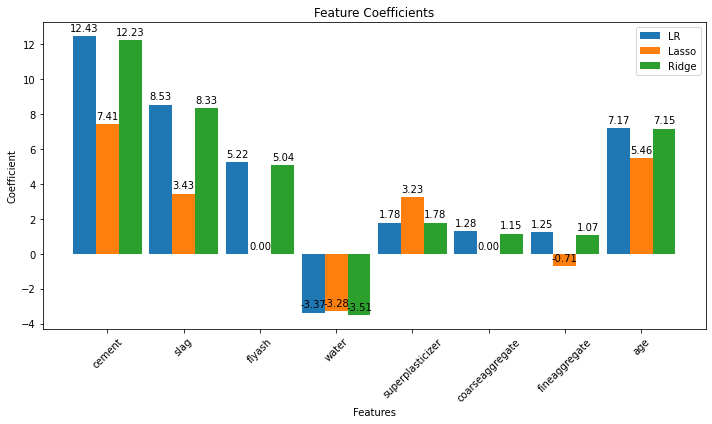

In [ ]:
coeff_lr_m = lr_m.coef_
coeff_lasso = lasso.coef_
coeff_ridge = ridge.coef_

labels = df.columns[:-1]

x = np.arange(len(labels)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - 2*(width/2), coeff_lr_m, width, label='LR')
rects2 = ax.bar(x, coeff_lasso, width, label='Lasso')
rects3 = ax.bar(x + 2*(width/2), coeff_ridge, width, label='Ridge')

ax.set_ylabel('Coefficient')
ax.set_xlabel('Features')
ax.set_title('Feature Coefficients')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

Lasso Regression, reduces the complexity of the model by keeping the coefficients as low as possible. Also, Coefficients with Linear and Ridge are almost same.

##### Plotting Predictions

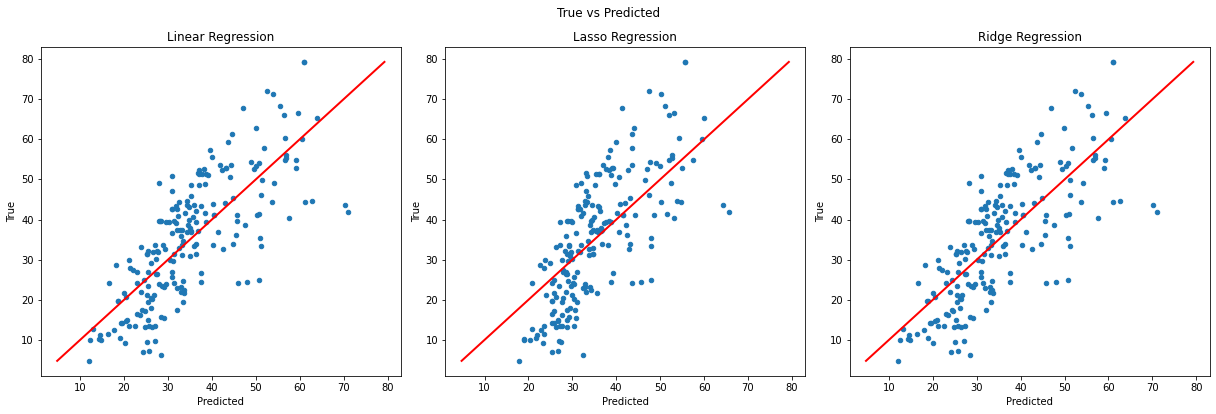

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(17,6))

ax1.scatter(Y_pred_lr_m, Y_test, s=20)
ax1.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', lw=2)
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("Linear Regression")

ax2.scatter(Y_pred_lasso, Y_test, s=20)
ax2.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', lw=2)
ax2.set_ylabel("True")
ax2.set_xlabel("Predicted")
ax2.set_title("Lasso Regression")

ax3.scatter(Y_pred_ridge, Y_test, s=20)
ax3.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', lw=2)
ax3.set_ylabel("True")
ax3.set_xlabel("Predicted")
ax3.set_title("Ridge Regression")

fig.suptitle("True vs Predicted")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

Looking at the graphs between predicted and true values of the target variable, we can conclude that Linear and Ridge Regression perform well as the predictions are closer to the actual values. While Lasso Regression reduces the complexity at the cost of loosing performance in this case. (The closer the points are to the red line, the less the error is.)

#### Decision Trees

Another algorithm that would give better performance in this case would be Decision Trees, since we have a lot of zeros in some of the input features as seen from their distributions in the pair plot above. This would help the decision trees build trees based on some conditions on features which can further improve performance.

Model				 RMSE 		 MSE 		 MAE 		 R2
Decision Tree Regressor 	 5.89 		 34.71 		3.85 		0.86


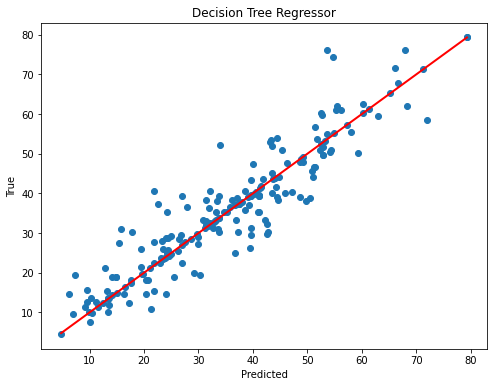

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_m = DecisionTreeRegressor()

dt_m.fit(X_train, Y_train)

Y_pred_dt_m = dt_m.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Decision Tree Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(Y_test, Y_pred_dt_m)),mean_squared_error(Y_test, Y_pred_dt_m),
            mean_absolute_error(Y_test, Y_pred_dt_m), r2_score(Y_test, Y_pred_dt_m)))

plt.figure(figsize=(8,6))
plt.scatter(Y_test, Y_pred_dt_m)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor")
plt.show()

The Root Mean Squared Error (RMSE) has come down from 10.89 to 5.89, so the Decision Tree Regressor has improved the performance by a significant amount. This can be observed in the plot as well as more points are on the line. 

#### Random Forest Regressor

Since Using a Decision Tree Regressor has improved our performance, we can further improve the performance by ensembling more trees. Random Forest Regressor trains randomly initialized trees with random subsets of data sampled from the training data, this will make our model more robust.

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 4.54 		 20.61 		3.09 		0.92


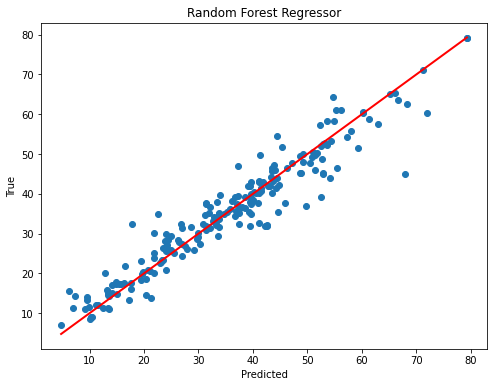

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_m = RandomForestRegressor(n_estimators=100)

rf_m.fit(X_train, Y_train)

Y_pred_rf_m = rf_m.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(Y_test, Y_pred_rf_m)),mean_squared_error(Y_test, Y_pred_rf_m),
            mean_absolute_error(Y_test, Y_pred_rf_m), r2_score(Y_test, Y_pred_rf_m)))

plt.figure(figsize=(8,6))
plt.scatter(Y_test, Y_pred_rf_m)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Regressor")
plt.show()

The RMSE with Random Forest Regressor is now 4.54, we have reduced the error by ensembling multiple trees.

##### Feature importances for Decision Tree and Random Forest

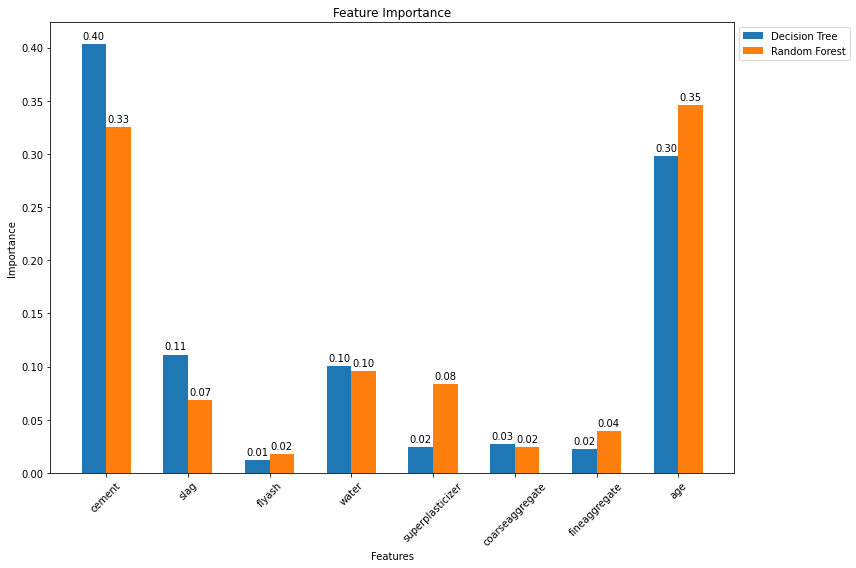

In [ ]:
feature_dt_m = dt_m.feature_importances_
feature_rf_m = rf_m.feature_importances_

labels = df.columns[:-1]

x = np.arange(len(labels)) 
width = 0.3

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(x-(width/2), feature_dt_m, width, label='Decision Tree')
rects2 = ax.bar(x+(width/2), feature_rf_m, width, label='Random Forest')

ax.set_ylabel('Importance')
ax.set_xlabel('Features')
ax.set_title('Feature Importance')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend(loc="upper left", bbox_to_anchor=(1,1))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

Cement and Age are treated as the most important features by tree based models. Flyash, Coarse and Fine aggregates are least important factors when predicting the strength of Concrete.

##### Comparision

Finally, lets compare the results of all the algorithms.

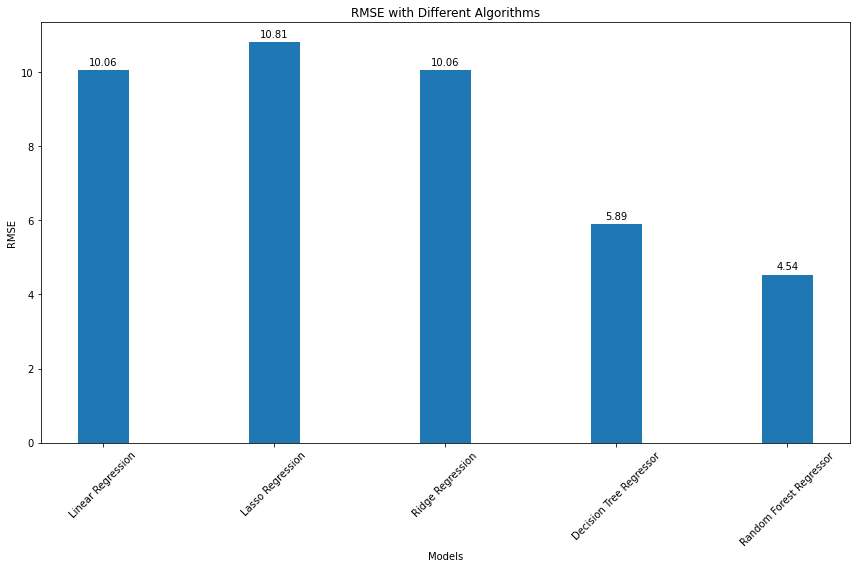

In [ ]:
models = [lr_m, lasso, ridge, dt_m, rf_m]
names = ["Linear Regression", "Lasso Regression", "Ridge Regression", 
         "Decision Tree Regressor", "Random Forest Regressor"]
rmses = []

for model in models:
    rmses.append(np.sqrt(mean_squared_error(Y_test, model.predict(X_test))))

x = np.arange(len(names)) 
width = 0.3

fig, ax = plt.subplots(figsize=(12,8))
rects = ax.bar(x, rmses, width)
ax.set_ylabel('RMSE')
ax.set_xlabel('Models')
ax.set_title('RMSE with Different Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45)
autolabel(rects)
fig.tight_layout()
plt.show()

**Mean Absolute Error**

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
for model,model_name in zip(models,names):
    mae = mean_absolute_error(model.predict(X_test), Y_test)
    print(f"{model_name} MEA = {mae}")

Linear Regression MEA = 8.184411001459837
Lasso Regression MEA = 8.87202337337953
Ridge Regression MEA = 8.187197989804714
Decision Tree Regressor MEA = 3.8536893203883498
Random Forest Regressor MEA = 3.0933772052704565


**Accuracy Score checking**

In [ ]:
# Accuracy Score checking

for model,model_name in zip(models,names):
    accuracy = model.score(X_test,Y_test)
    print(f"{model_name} accuracy score = {accuracy}")

Linear Regression accuracy score = 0.5883102027905318
Lasso Regression accuracy score = 0.524606323613517
Ridge Regression accuracy score = 0.5878928519483777
Decision Tree Regressor accuracy score = 0.8586580004562608
Random Forest Regressor accuracy score = 0.916090136035038


In [ ]:
models = [lr_m, lasso, ridge, dt_m, rf_m]
names = ["Linear Regression", "Lasso Regression", "Ridge Regression", 
         "Decision Tree Regressor", "Random Forest Regressor"]

In [ ]:
models = pd.DataFrame({
    'Model' : names,
    'Score' : [lr_m.score(X_test, Y_test),  lasso.score(X_test, Y_test), ridge.score(X_test, Y_test), dt_m.score(X_test, Y_test),rf_m.score(X_test, Y_test)]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,Random Forest Regressor,0.916090
3,Decision Tree Regressor,0.858658
0,Linear Regression,0.588310
2,Ridge Regression,0.587893
1,Lasso Regression,0.524606


#### Conclusion

**Random Forest Regressor** is the best choice for this problem.

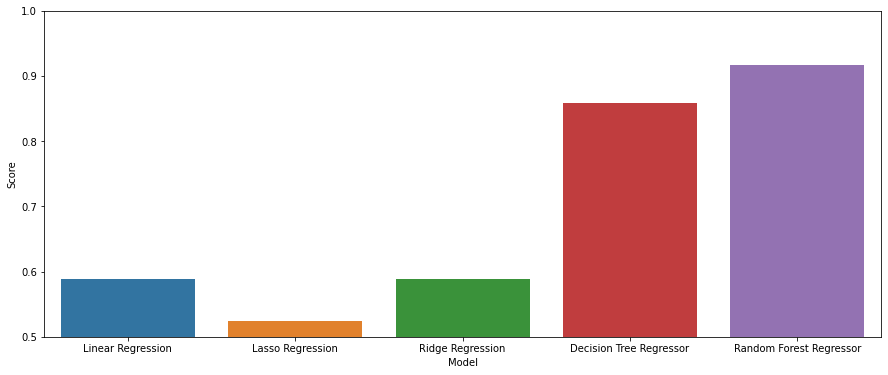

In [ ]:
plt.figure(figsize = (15, 6))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.ylim(0.50, 1)
plt.show()

**Conclusion**

We have analysed the Compressive Strength Data and used Machine Learning to Predict the Compressive Strength of Concrete. 

We have used Linear Regression and its variations, Decision Trees and Random Forests to make predictions and compared their performance. 

Random Forest Regressor has the lowest RMSE and is a good choice for this problem. 

In [ ]:
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

**Hyper parameter tuning**

In [ ]:
# Split data
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(df.drop(['flyash', 'coarseaggregate', 'fineaggregate', 'csMPa'], axis=1), 
#                                                    df['csMPa'], 
#                                                    test_size = 0.2, 
#                                                    random_state=42)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# Prepare parameter grid
# param_grid = {
#     'criterion': ['mse', 'mae', 'friedman_mse'], 
#     'learning_rate': [0.05, 0.1, 0.15, 0.2], 
#     'max_depth': [2, 3, 4, 5], 
#     'max_features': ['sqrt', None], 
#     'max_leaf_nodes': list(range(2, 10)),
#     'n_estimators': list(range(50, 500, 50)),
#     'subsample': [0.8, 0.9, 1.0]
# }

In [ ]:
# # Perform hyper parameter tuning using GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV

# rs = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42), param_distributions=param_grid, 
#                  return_train_score= True, n_jobs=-1, verbose=2, cv = 10, n_iter=500)
# rs.fit(X_train, y_train)